In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history =  model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.2586 - accuracy: 0.9202 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 2/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0882 - accuracy: 0.9736 - val_loss: 0.0434 - val_accuracy: 0.9858
Epoch 3/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0694 - accuracy: 0.9797 - val_loss: 0.0326 - val_accuracy: 0.9891
Epoch 4/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0548 - accuracy: 0.9836 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 5/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0321 - val_accuracy: 0.9893
Epoch 6/12
60000/60000 [==============================] - 4s 63us/step - loss

In [2]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

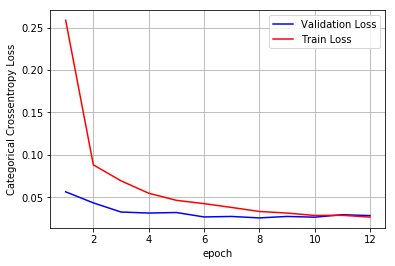

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Assignment

## Model 1:
Architecture:-
Input (28,28,1) ->(3, 3) Conv, 32 -> (3, 3) Conv, 64 -> Pool/2 ->(3, 3) Conv, 128 ->Dropout (0.25) -> Flatten -> Dense, 256 -> Dropout (0.5) -> Softmax

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.1925 - accuracy: 0.9400 - val_loss: 0.0412 - val_accuracy: 0.9861
Epoch 2/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0362 - val_accuracy: 0.9872
Epoch 3/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0285 - val_accuracy: 0.9904
Epoch 4/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0283 - val_accuracy: 0.9899
Epoch 5/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 0.0226 - val_accuracy: 0.9915
Epoch 6/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0217 - val_accuracy: 0.9925
Epoch 7/12
60000/60000 [==============================] - 6s 1

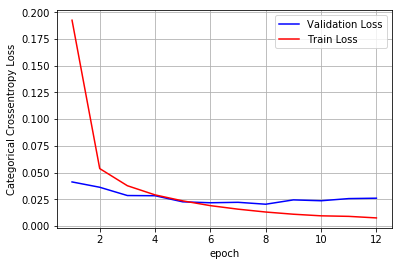

In [5]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Model 2:
Architecture:-
Input (28,28,1) ->(5, 5) Conv, 32 -> (5, 5) Conv, 64 -> Pool/2 ->(5, 5) Conv, 96 -> (5, 5) Conv, 128 -> (5, 5) Conv, 224 ->
Dropout (0.3) -> Flatten -> Dense, 256 -> Dropout (0.5) -> Softmax



In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(96, kernel_size=(5, 5),activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(224, kernel_size=(5, 5),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 228us/step - loss: 0.2925 - accuracy: 0.9073 - val_loss: 0.0420 - val_accuracy: 0.9873
Epoch 2/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.0554 - accuracy: 0.9833 - val_loss: 0.0256 - val_accuracy: 0.9919
Epoch 3/12
60000/60000 [==============================] - 13s 216us/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0247 - val_accuracy: 0.9926
Epoch 4/12
60000/60000 [==============================] - 13s 214us/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0249 - val_accuracy: 0.9924
Epoch 5/12
60000/60000 [==============================] - 13s 215us/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0182 - val_accuracy: 0.9944
Epoch 6/12
60000/60000 [==============================] - 13s 215us/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.0208 - val_accuracy: 0.9934
Epoch 7/12
60000/60000 [==============================] 

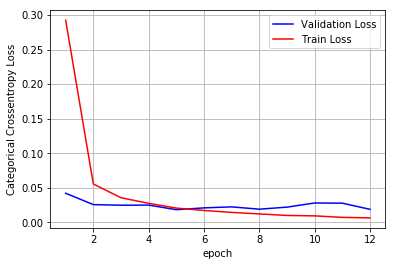

In [7]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Model 3:
Architecture:-
Input (28,28,1) ->(7, 7) Conv, 32 -> (7, 7) Conv, 64 -> Pool/2 ->(7, 7) Conv, 96 -> (7, 7) Conv, 128 -> Pool/2 ->(7, 7) Conv, 224 -> (7, 7) Conv, 256 -> (7, 7) Conv, 256 ->Dropout (0.3) -> Flatten -> Dense, 256 -> Dropout (0.5) -> Softmax

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(96, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Conv2D(128, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(224, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(7, 7),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 562us/step - loss: 0.6478 - accuracy: 0.7778 - val_loss: 0.0825 - val_accuracy: 0.9762
Epoch 2/12
60000/60000 [==============================] - 32s 532us/step - loss: 0.0606 - accuracy: 0.9832 - val_loss: 0.0345 - val_accuracy: 0.9905
Epoch 3/12
60000/60000 [==============================] - 32s 533us/step - loss: 0.0380 - accuracy: 0.9898 - val_loss: 0.0250 - val_accuracy: 0.9927
Epoch 4/12
60000/60000 [==============================] - 32s 531us/step - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.0257 - val_accuracy: 0.9931
Epoch 5/12
60000/60000 [==============================] - 32s 532us/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.0217 - val_accuracy: 0.9935
Epoch 6/12
60000/60000 [==============================] - 32s 533us/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0222 - val_accuracy: 0.9933
Epoch 7/12
60000/60000 [==============================] 

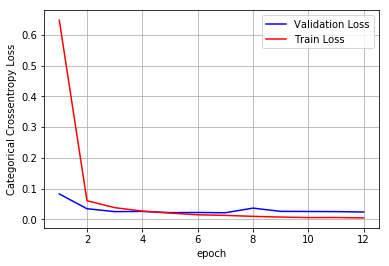

In [9]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclustion:

In [10]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['# Conv Layers', 'Filter Size', 'Test Loss', 'Test Accuracy']
table.add_row([3, '(3, 3)', 0.0259, 0.992])
table.add_row([5, '(5, 5)', 0.0187, 0.9955])
table.add_row([7, '(7, 7)', 0.0237, 0.994])
print(table)

+---------------+-------------+-----------+---------------+
| # Conv Layers | Filter Size | Test Loss | Test Accuracy |
+---------------+-------------+-----------+---------------+
|       3       |    (3, 3)   |   0.0259  |     0.992     |
|       5       |    (5, 5)   |   0.0187  |     0.9955    |
|       7       |    (7, 7)   |   0.0237  |     0.994     |
+---------------+-------------+-----------+---------------+
